In [86]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install plotly
! pip install seaborn

! pip install statsmodels
! pip install sklearn


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 7.6 MB/s eta 0:00:000:00:01

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [87]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

In [114]:
# 1.1 Get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [115]:
# 1.2 Take a sample
df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [116]:
# 1.2 Take a simple description for numerical values
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Hints, Meaning of each attribute:
'''
Age (numerical)
Job: Type of Job (categorical)
Marital: marital status (categorical)
Education: (categorical)
Default: has credit in default? (categorical)
Housing: has housing loan? (categorical)
Loan: has personal loan? (categorical)
contact: contact communication type (categorcial)
month: last contact month of year (categorical)
day_of_week: last contact day of the week (categorical)
duration: last contact duration, in seconds (numerical)
    Important note: this output highly affects the output target (if duration=0, then y='no'). 
    Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. 
    Consider if you should include it or not for a realistic predictive model.
campaign: number of contacts performed during this campaign and for this client (numerical)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numerical)
poutcome: outcome of the previous marketing campaign (categorical)
    Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index- monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate: - daily indicator(numeric)
nr.employed: number of employees - quarterly indicator (numeric)

Target variable:
y: has the client subscribed a term deposit?
'''

In [119]:
df_raw = df.copy()

In [120]:
# Drop NAs & duplicates
df_raw = df_raw.dropna().drop_duplicates()
#df = df.reset_index(inplace = False)[['url','is_spam']]

In [122]:
# Step 2. Make a basic EDA

df_raw.shape
print(f'The Dataset has {df_raw.shape[0]} "observations" with {df_raw.shape[1]} columns')

df_len = len(df_raw)

The Dataset has 41176 "observations" with 21 columns


Categorical features analysis

There are 11 "jobs" in 41176 observations 

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


<AxesSubplot:>

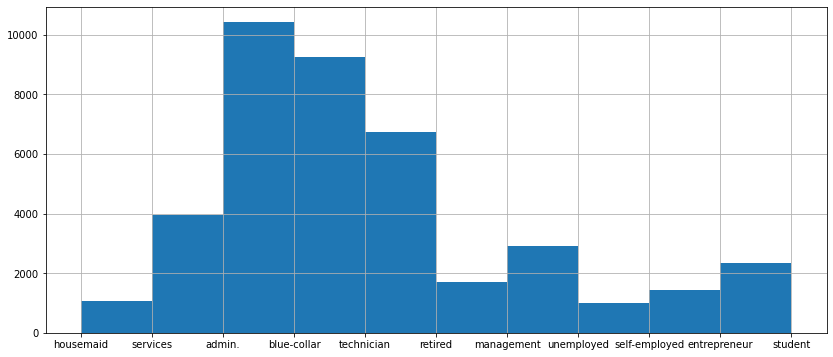

In [124]:
# 'job' analysis

# Replace unknown with mode:
condition  = (df_raw['job'] == 'unknown')
df_raw.loc[condition, 'job'] = df_raw['job'].mode()

nuniques = df_raw['job'].nunique()
counts = df_raw['job'].value_counts()
print(f'There are {nuniques} "jobs" in {len(df_raw)} observations \n')
print(f'{counts}')

fig = plt.figure(figsize=(14,6))
ax = fig.gca()
df_raw['job'].hist(ax=ax)

There are 3 "maritals" in 41176 observations 

married     24921
single      11564
divorced     4611
Name: marital, dtype: int64


<AxesSubplot:>

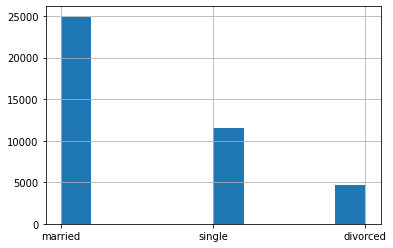

In [125]:
# 'marital' analysis

condition  = (df_raw['marital'] == 'unknown')
df_raw.loc[condition, 'marital'] = df_raw['marital'].mode()

nuniques = df_raw['marital'].nunique()
counts = df_raw['marital'].value_counts()
print(f'There are {nuniques} "maritals" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['marital'].hist()

There are 7 "educations" in 41176 observations 

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64


<AxesSubplot:>

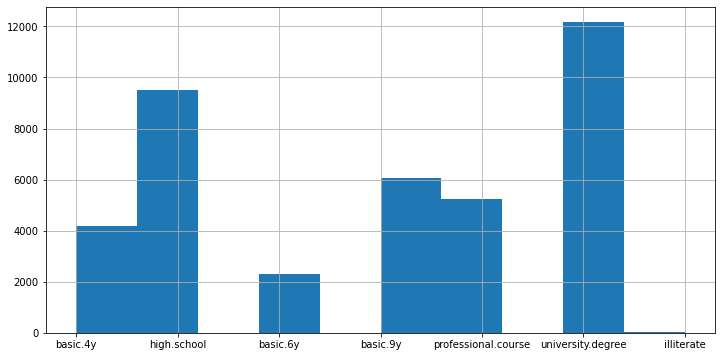

In [126]:
# 'education' analysis

# Replace unknown with mode:
condition  = (df_raw['education'] == 'unknown')
df_raw.loc[condition, 'education'] = df_raw['education'].mode()

nuniques = df_raw['education'].nunique()
counts = df_raw['education'].value_counts()
print(f'There are {nuniques} "educations" in {len(df_raw)} observations \n')
print(f'{counts}')

fig = plt.figure(figsize=(12,6))
ax = fig.gca()
df_raw['education'].hist(ax=ax)

There are 2 "defaults" in 41176 observations 

no     32577
yes        3
Name: default, dtype: int64


<AxesSubplot:>

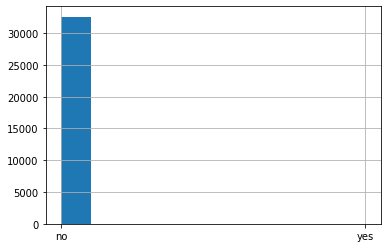

In [127]:
# 'default' analysis

# Replace unknown with mode:
condition  = (df_raw['default'] == 'unknown')
df_raw.loc[condition, 'default'] = df_raw['default'].mode()

nuniques = df_raw['default'].nunique()
counts = df_raw['default'].value_counts()
print(f'There are {nuniques} "defaults" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['default'].hist()

Pendiente: pasar de categorical(yes, no) to boolean

There are 2 "housings" in 41176 observations 

yes    21571
no     18615
Name: housing, dtype: int64


<AxesSubplot:>

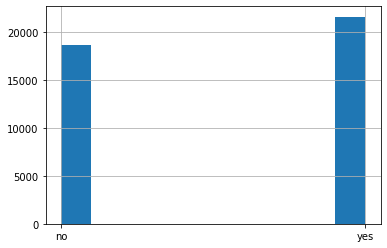

In [128]:
# 'housing' analysis

# Replace unknown with mode:
condition  = (df_raw['housing'] == 'unknown')
df_raw.loc[condition, 'housing'] = df_raw['housing'].mode()

nuniques = df_raw['housing'].nunique()
counts = df_raw['housing'].value_counts()
print(f'There are {nuniques} "housings" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['housing'].hist()

There are 2 "loans" in 41176 observations 

no     33938
yes     6248
Name: loan, dtype: int64


<AxesSubplot:>

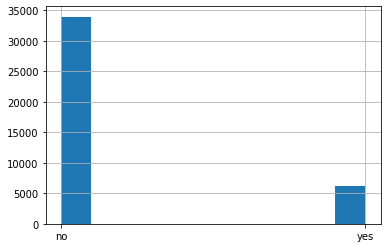

In [130]:
# 'loan' analysis

# Replace unknown with mode:
condition  = (df_raw['loan'] == 'unknown')
df_raw.loc[condition, 'loan'] = df_raw['loan'].mode()

nuniques = df_raw['loan'].nunique()
counts = df_raw['loan'].value_counts()
print(f'There are {nuniques} "loans" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['loan'].hist()

There are 2 "contacts" in 41176 observations 

cellular     26135
telephone    15041
Name: contact, dtype: int64


<AxesSubplot:>

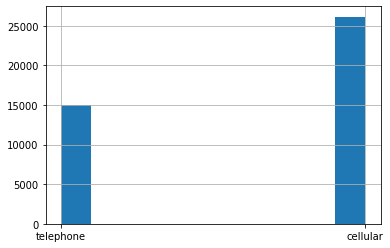

In [131]:
# 'contact' analysis

# Replace unknown with mode:
condition  = (df_raw['contact'] == 'unknown')
df_raw.loc[condition, 'contact'] = df_raw['contact'].mode()

nuniques = df_raw['contact'].nunique()
counts = df_raw['contact'].value_counts()
print(f'There are {nuniques} "contacts" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['contact'].hist()

There are 10 "months" in 41176 observations 

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


<AxesSubplot:>

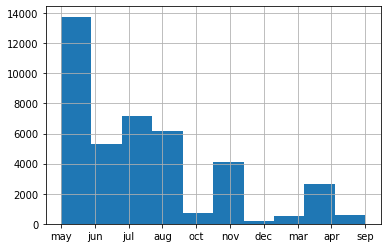

In [133]:
# 'month' analysis

nuniques = df_raw['month'].nunique()
counts = df_raw['month'].value_counts()
print(f'There are {nuniques} "months" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['month'].hist()

There are 5 "day_of_week" in 41176 observations 

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


<AxesSubplot:>

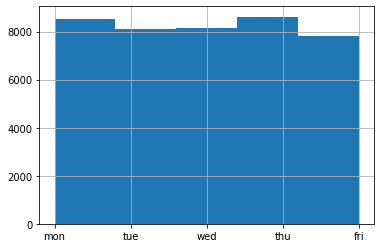

In [136]:
# 'day_of_week' analysis

nuniques = df_raw['day_of_week'].nunique()
counts = df_raw['day_of_week'].value_counts()
print(f'There are {nuniques} "day_of_week" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['day_of_week'].hist(bins=5)

There are 3 "poutcomes" in 41176 observations 

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


<AxesSubplot:>

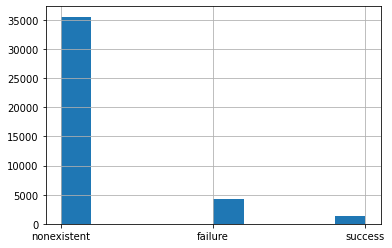

In [138]:
# 'poutcome' analysis

nuniques = df_raw['poutcome'].nunique()
counts = df_raw['poutcome'].value_counts()
print(f'There are {nuniques} "poutcomes" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['poutcome'].hist()

Numerical features analysis

There are 78 "ages" in 41176 observations 

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


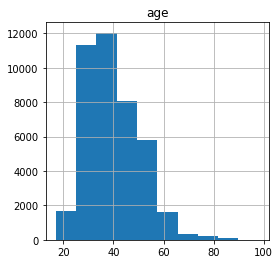

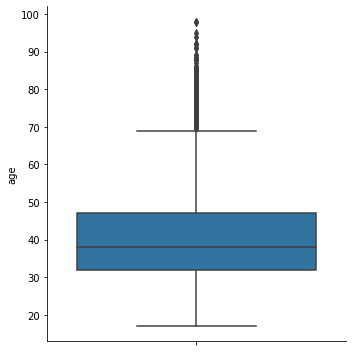

In [139]:
# 'age' analysis

nuniques = df_raw['age'].nunique()
counts = df_raw['age'].value_counts()
print(f'There are {nuniques} "ages" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('age', grid=True, figsize=(4,4), bins=10)
plt.show()

sns.catplot(y='age', kind='box', data=df_raw)
plt.show()

In [140]:
df_interim = df_raw.copy()

In [143]:
df_raw = df_interim.copy()

There are 1543 "durations" in 41172 observations 

90      170
85      170
136     168
73      167
124     163
       ... 
1479      1
1666      1
1169      1
1730      1
1868      1
Name: duration, Length: 1543, dtype: int64


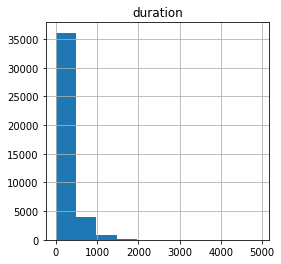

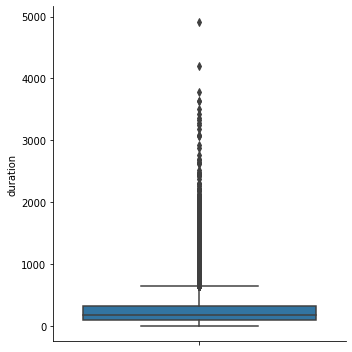

In [148]:
# 'duration' analysis

# remove rows which duration = 0
df_raw = df_raw.drop(df_raw[df_raw.duration == 0].index)

nuniques = df_raw['duration'].nunique()
counts = df_raw['duration'].value_counts()
print(f'There are {nuniques} "durations" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('duration', grid=True, figsize=(4,4), bins=10)
plt.show()

sns.catplot(y='duration', kind='box', data=df_raw)
plt.show()

There are 42 "campaigns" in 41176 observations 

1     17634
2     10567
3      5339
4      2649
5      1599
6       979
7       629
8       400
9       283
10      224
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64


<AxesSubplot:>

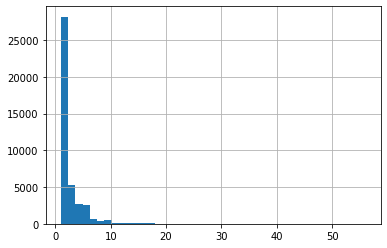

In [154]:
# 'campaign' analysis

nuniques = df_raw['campaign'].nunique()
counts = df_raw['campaign'].value_counts()
print(f'There are {nuniques} "campaigns" in {df_len} observations \n')
print(f'{counts}')

# 'campaign' to categorical
#df_raw['campaign'] = pd.Categorical(df_raw.campaign)
#df_raw['campaign'].dtypes

df_raw['campaign'].hist(bins=nuniques)


There are 27 "pdays" in 41176 observations 

999    39657
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64


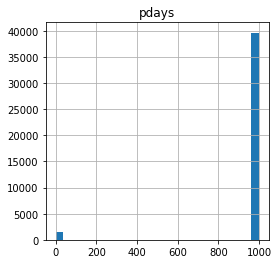

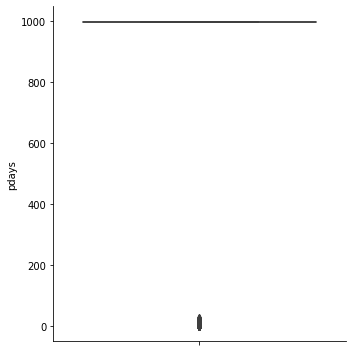

In [159]:
# 'pdays' analysis

nuniques = df_raw['pdays'].nunique()
counts = df_raw['pdays'].value_counts()
print(f'There are {nuniques} "pdays" in {df_len} observations \n')
print(f'{counts}')

df_raw.hist('pdays', grid=True, figsize=(4,4), bins=nuniques)
plt.show()

sns.catplot(y='pdays', kind='box', data=df_raw)
plt.show()

In [ ]:
# 1.3 Transform if needed

In [ ]:
# 2.1 Split the dataset so to avoid bias

In [ ]:
# 2.2 Join the train sets to ease insights

In [ ]:
# 2.3 Get basic info

In [ ]:
# 2.4 Take a sample

In [ ]:
# 2.5 Describe the numerical and date variables

In [ ]:
# 2.6 Describe the categorical variables

In [ ]:
# 2.7 Perform univariate analysis - histograms

In [ ]:
# 2.8 Perform univariate analysis - boxplots

In [ ]:
# 2.9 Perform bivariate analysis - scatter matrix

In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial

In [ ]:
# 2.11 Perform multivariate analysis - VIF

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals

In [ ]:
# 3.1 Perform model fit - A

In [ ]:
# 3.2 Perform model fit - B

In [ ]:
# 3.3 Calculate metrics on model A

In [ ]:
# 3.4 Calculate metrics on model B

In [ ]:
# Step 4. Write up your conclusions